# DELIVERY_TIME DATASET

In [ ]:


import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv("delivery_time.csv")
df

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [ ]:
df.head(5)

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [ ]:
df.isnull()

,Delivery Time,Sorting Time
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False


In [ ]:
df.isnull().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

**EDA and Data Visualization**

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [ ]:
df.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


<ipython-input-8-96b8707a740d>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Delivery Time"])


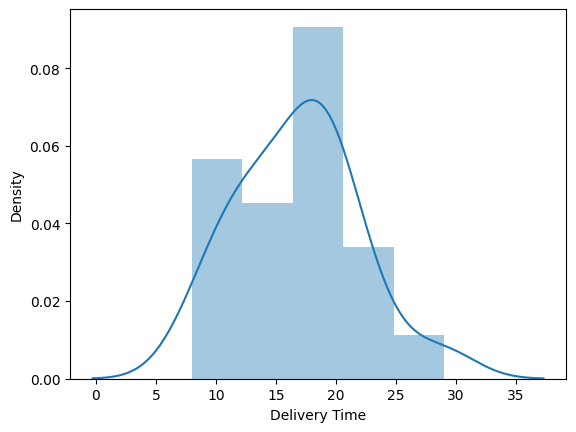

In [ ]:
sns.distplot(df["Delivery Time"])
plt.show()

<ipython-input-9-27ffa5a8fb0a>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Sorting Time"])


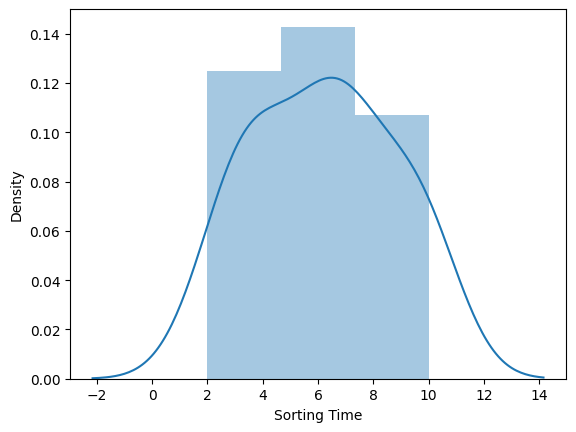

In [ ]:
sns.distplot(df["Sorting Time"])
plt.show()

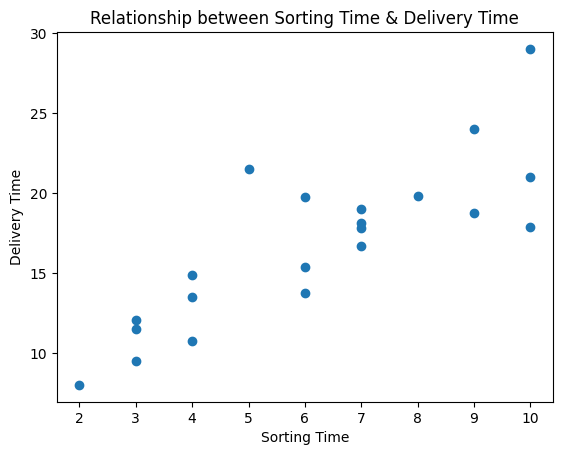

In [ ]:
plt.scatter(df["Sorting Time"],df["Delivery Time"])
plt.title("Relationship between Sorting Time & Delivery Time")
plt.xlabel("Sorting Time")
plt.ylabel("Delivery Time")
plt.show()

In [ ]:
df=df.rename({"Delivery Time":"DT","Sorting Time":"ST"},axis=1)
df.head(5)

,DT,ST
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [ ]:
df_log=np.log(df)

In [ ]:
df.corr()

,DT,ST
DT,1.000000,0.825997
ST,0.825997,1.000000


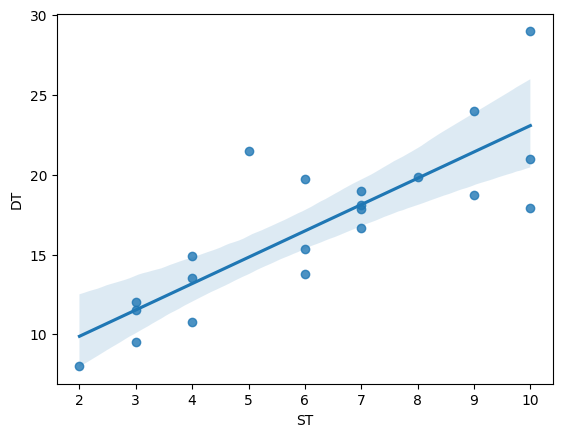

In [ ]:
sns.regplot(x=df["ST"], y=df["DT"])
plt.show()

In [ ]:
x=df["DT"]
y=df["ST"]

In [ ]:
model=smf.ols("DT~ST",data=df).fit()


In [ ]:
model.params

Intercept    6.582734
ST           1.649020
dtype: float64

In [ ]:
model.tvalues , model.pvalues

(Intercept    3.823349
 ST           6.387447
 dtype: float64,
 Intercept    0.001147
 ST           0.000004
 dtype: float64)

In [ ]:
model.rsquared , model.rsquared_adj

(0.6822714748417231, 0.6655489208860244)

In [ ]:
delivery_time = (6.582734) + (1.649020)*(5)
delivery_time

14.827834

In [ ]:
new_data=pd.Series([5,8])
new_data

0    5
1    8
dtype: int64

In [ ]:
data_pred=pd.DataFrame(new_data,columns=['ST'])
data_pred


,ST
0,5
1,8


In [ ]:
model.predict(data_pred)


0    14.827833
1    19.774893
dtype: float64